

# Titanic Dataset Analysis
**Author:** AARON 
**Date:** October, 29, 2025 
**Objective:** 



## Introduction
This project uses the California housing dataset to predict house prices based on features such as median income, average number of rooms, and house age. We'll clean the data, train a linear regression model, and explore ways to improve performance.

I have worked through this to learn how a basic model works for machine learning.  This helps me understand the framework required for future assignements.


## Imports
In the code cell below, import the necessary Python libraries for this notebook.  

In [1]:

# Import pandas for data manipulation and analysis (we might want to do more with it)
import pandas as pd
# Import scatter_matrix for data exploration
from pandas.plotting import scatter_matrix
# Import matplotlib for creating static visualizations
import matplotlib.pyplot as plt

# Import seaborn for statistical data visualization (built on matplotlib)
import seaborn as sns
# Import the California housing dataset from sklearn
from sklearn.datasets import fetch_california_housing

# Import train_test_split for splitting data into training and test sets
from sklearn.model_selection import train_test_split
# Import LinearRegression for building a linear regression model
from sklearn.linear_model import LinearRegression
# Import performance metrics for model evaluation
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

This is a Markdown cell

## Section 1. Load and Explore the Data

### 1.1 Load the dataset and display basic information


In [3]:


# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Display basic information about the dataset using the info() method.
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [3]:
# Display the first 10 rows.
print(titanic.head(10))

   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

### 1.2 Check for missing values and display summary statistics

In [4]:
# Check for missing values using the isnull() method and then the sum() method. 
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
# Display summary statistics using the describe() method

print(titanic.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [6]:
# Check for correlations using the corr() method and tell it to use only the numeric features. 

print(titanic.corr(numeric_only=True))

            survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.280328  0.198270  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.000000  


Reflection 1:
1) How many data instances are there? 891
2) How many features are there? 15
3) What are the names?  
        survived 
        pclass           
        sex             
        age            
        sibsp            
        parch            
        fare             
        embarked         
        class            
        who              
        adult_male       
        deck           
        embark_town      
        alive            
        alone            
        
4) Are there any missing values? age is missing 177 points And deck is missing 688 points
5) Are there any non-numeric features? Yes, 9 of the 14 features are non-numeric.

6) Are the data instances sorted on any of the attributes?  There is no a sort on any attribute.
7) What are the units of age? Years
8) What are the minimum, median and max age? The youngest person was 5 months.  The mdian was 28. The max age was 80.
9) What two different features have the highest correlation?  parch and sibsp had the highest correlation at 0.415

10) Are there any categorical features that might be useful for prediction?  Yes, Class would be important.

## Section 2. Data Exploration and Preparation
### 2.1 Explore Data Patterns and Distributions

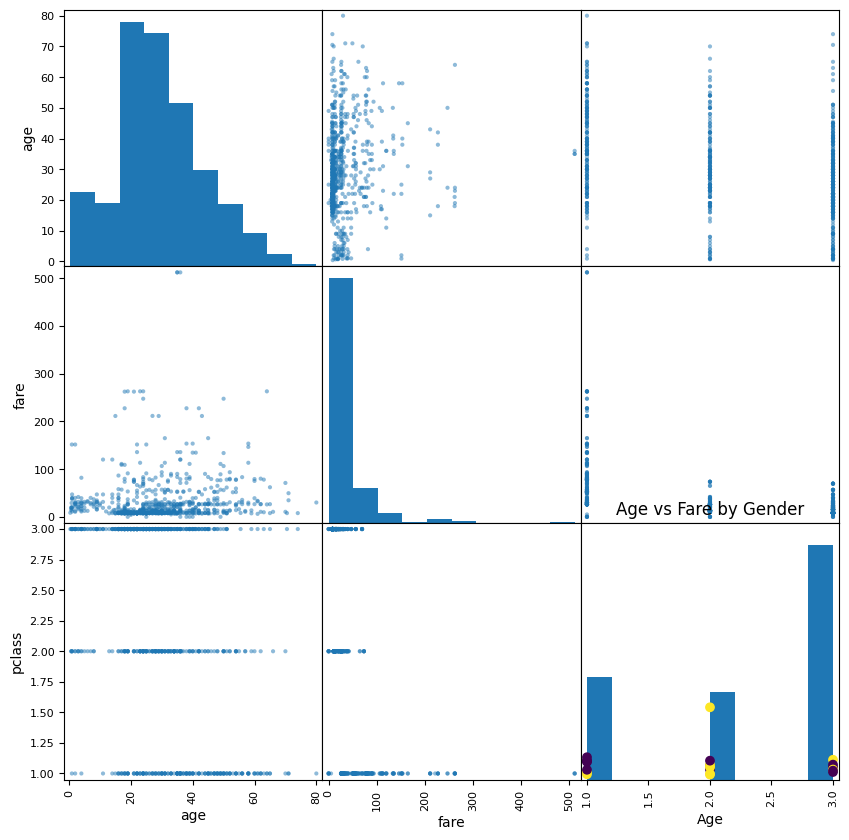

In [4]:
# Create a scatter plot of age vs fare, colored by gender:

attributes = ['age', 'fare', 'pclass']
scatter_matrix(titanic[attributes], figsize=(10, 10))

plt.scatter(titanic['age'], titanic['fare'], c=titanic['sex'].apply(lambda x: 0 if x == 'male' else 1))
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Gender')
plt.show()

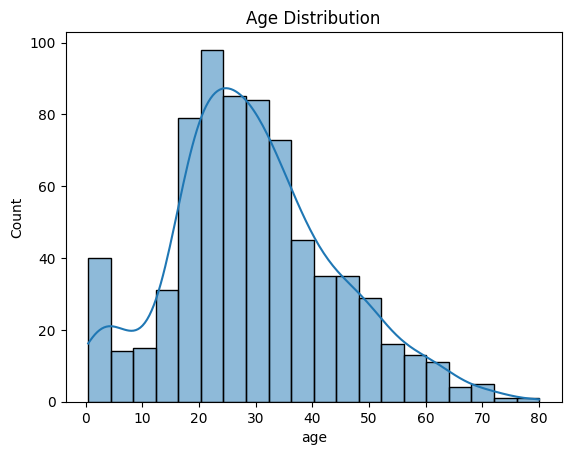

In [5]:
# Create a histogram of age:

sns.histplot(titanic['age'], kde=True)
plt.title('Age Distribution')
plt.show()

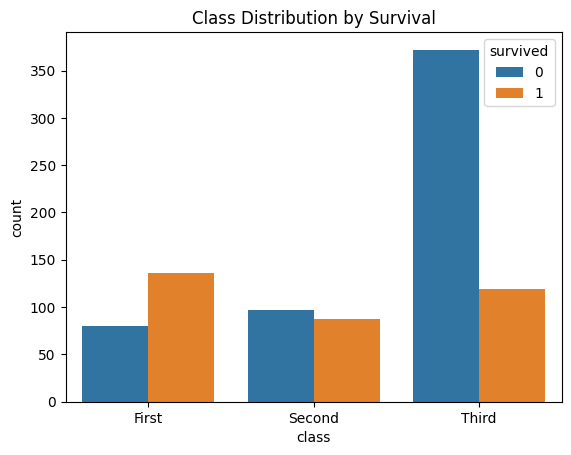

In [6]:
# Create a count plot for class and survival:
sns.countplot(x='class', hue='survived', data=titanic)
plt.title('Class Distribution by Survival')
plt.show()

### Reflection 2.1:


What patterns or anomalies do you notice?  There were a lot of very young children aboard.  There must have been some reason third class had such a high mortality rate.
Do any features stand out as potential predictors? It looks like higher fares were paid by women.
Are there any visible class imbalances? Younger people appear to be in third class.

### 2.2 Handle Missing Values and Clean Data

In [7]:
# Age was missing values. We can impute missing values for age using the median:

titanic['age'].fillna(titanic['age'].median(), inplace=True)

#Embark_town was missing values. We can drop missing values for embark_town (or fill with mode):

titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_12084\4149946706.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_12084\4149946706.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

### 2.3 Feature Engineering

In [8]:
# Create a new feature: Family size
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Convert categorical data to numeric:
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Create a binary feature for 'alone':
titanic['alone'] = titanic['alone'].astype(int)



### Reflection 2.3

Why might family size be a useful feature for predicting survival?  This may help if a families were together.  I suspect there were seperations though.
Why convert categorical data to numeric? It helps for mathematical cacluations for models and one-hop encoding.


## Section 3. Feature Selection and Justification
### 3.1 Choose features and target

For classification, we’ll use survived as the target variable.

Input features: age, fare, pclass, sex, family_size
Target: survived



### 3.2 Define X and y

In [ ]:
# Assign input features to X
# Assign target variable to y (as applicable)

X = titanic[['age', 'fare', 'pclass', 'sex', 'family_size']]
y = titanic['survived']

### Reflection 3:

Why are these features selected?  These were determined in anaylsis above to have an impact.
Are there any features that are likely to be highly predictive of survival?  I think class and sex will be the most predictive.